# Ajustando o caminho do Python

In [50]:
import os 
import sys
dir_path = os.getcwd()
dir_list = dir_path.split(os.path.sep)
dir_list = [os.path.sep] + dir_list[:dir_list.index("eidoloom")] + ["eidoloom", "src", "eidoloom"]
dir_list = os.path.join(*dir_list)
sys.path.append(dir_list)
print(dir_list)

/home/hortencia/PycharmProjects/eidoloom/src/EidoloomCorpora


# Carregando o Generic Visitor

O generic visitor atravessa a árvore sintática ast para cada código nos diretórios.

In [51]:
import pytagger
gv = pytagger.GenV()
gv.visit_corpus()


# Computa a janela de padrões para cada arquivo código

A coleção CODES contém todas as classes instanciadas durante a visita do corpus.

In [1]:
codes = pytagger.Code.CODES
pytagger.Code.PATTERNS = {}
nomes = [code.compute_patterns() or key[:4].lower() for key, code in codes.items()]
print(nomes)
print(pytagger.Code.PATTERNS)

NameError: name 'pytagger' is not defined

# Inserindo script de leitura, visualização para gerar o dataframe

Define o dataframe com exios rotulados (linhas e colunas), além disso o script determina o alinhamento dos rótulos com as operações para a plotagem.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm

patterns = {key: values for key, values in pytagger.Code.PATTERNS.items() if min(values)>3}
data_pid =  {key: (pid, values) for pid, (key, values) in enumerate(patterns.items()) if len(values) == len(nomes)}
data = {"p{:02}".format(pid): [10*v/max(values) for v in values] for key, (pid,values) in data_pid.items() if min(values)>3}
data['kind']=[codes[nome[:4]].kind for nome in nomes]
df = pd.DataFrame(data, index=nomes)
df

NameError: name 'pytagger' is not defined

# Gerando script gráfico em barras

O scritp gera o gráfico de barras empilhadas verticais para facilitar a compreensão e a análise de dados, possibilita redimensionar a area de plotagem.

In [ ]:
df.plot.bar(stacked=True, figsize=(15,10))

# Gerando script gráfico em linhas

O scritp gera o gráfico de linhas para exibir informações com pontos de dados chamados de marcadores ligados por segmentos de linha reta, possibilita redimensionar a area de plotagem.

In [55]:
df.plot.line(figsize=(18,10))



TypeError: no numeric data to plot

# Gerando gráfico boxplot

O script gera o grafico boxplot para representar a variação de dados observados das variáveis, possibilita redimensionar a area de plotagem.

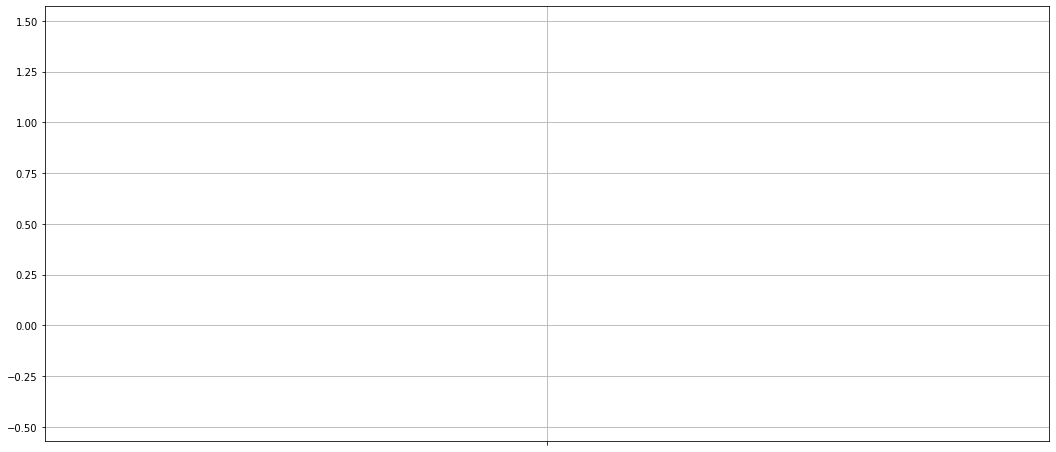

In [48]:
df.boxplot(figsize=(18,8))

# Gerando gráfico boxplot

O script gera o grafico boxplot para representar a variação de dados observados das variáveis, possibilita redimensionar a area de plotagem e visualização em cor.

EidoloomCorpora
Experimento02
basico
intermediario
transitorio


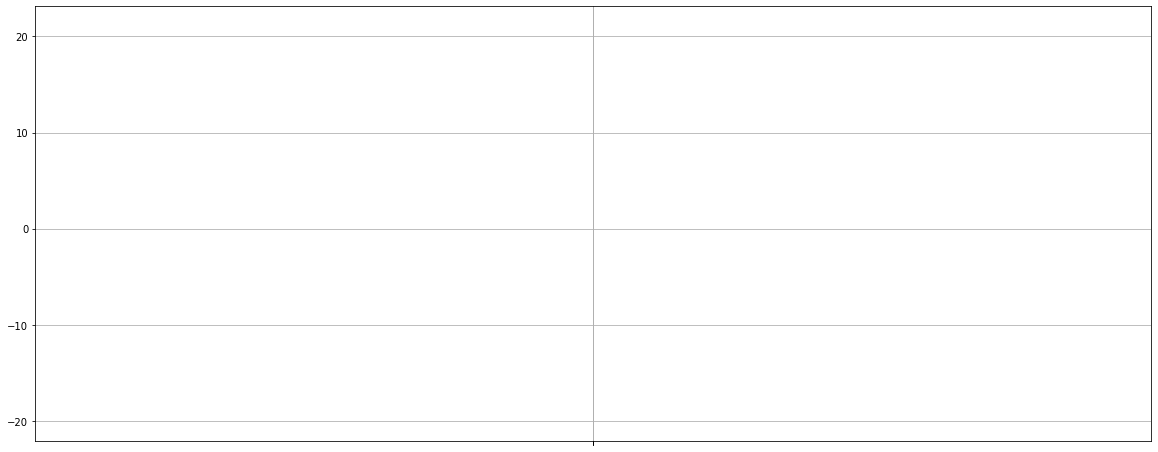

In [49]:
kinds = df.groupby(['kind'])
for tipo, (name, group) in enumerate(kinds):
    print(name)
    patch_artist=True
    #boxprops = dict(facecolor= c, color= c), capprops=dict(color=c), whiskerprops=dict(color=c), medianprops=dict(color=c)
    boxprops = dict(linestyle='-', linewidth=tipo*2+1, color='firebrick')
    flierprops = dict(marker='o', markerfacecolor='green', markersize=18,
                  linestyle='none')
    medianprops = dict(linestyle='-.', linewidth=4, color='firebrick')
    #props = dict(boxes="DarkBlue", whiskers="DarkBlue", medians="DarkBlue")

    plot = group.boxplot(figsize=(20,8), boxprops=boxprops)
    #https://matplotlib.org/3.1.1/gallery/statistics/bxp.html
    

# Gerando o gráfico de dispersão (scatterplot)

O script gera um gráfico de dispersão, utiliza coordenadas cartesianas para exibir valores com base no tipo do codigo - básico, intermediário e transitório.

In [15]:
from matplotlib import pyplot as plt

plt.figure(figsize=(20,10))
ax = sns.scatterplot(x="p01", y="p17", hue="kind", data=df, s=200)
for line in range(0, df.shape[0]):
    ax.text(df.p01[line]+0.2, df.p17[line], df.index[line][:4])

ValueError: Could not interpret input 'p01'

<Figure size 1440x720 with 0 Axes>

In [16]:
plt.figure(figsize=(20,10))
ax = sns.scatterplot(x="p07", y="p18", hue="kind", data=df, s=200)
for line in range(0, df.shape[0]):
    ax.text(df.p07[line]+0.2, df.p18[line], df.index[line][:4])

ValueError: Could not interpret input 'p07'

<Figure size 1440x720 with 0 Axes>

In [17]:
plt.figure(figsize=(18,10))
ax = sns.scatterplot(x="p15", y="p09", hue="kind", data=df, s=200) #,  figsize=(16,8))
for line in range(0, df.shape[0]):
    ax.text(df.p15[line]+0.2, df.p09[line], df.index[line][:4])

ValueError: Could not interpret input 'p15'

<Figure size 1296x720 with 0 Axes>

In [18]:
df.plot.area(stacked=False, figsize=(24,10))

TypeError: no numeric data to plot